In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn as sk
from __future__ import division
from sklearn.cross_validation import train_test_split

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.linear_model import LogisticRegression,ElasticNet,Lasso,LinearRegression
from sklearn.metrics import zero_one_loss, mean_squared_error, mean_squared_log_error

In [4]:
df = pd.read_excel('./BioCode for Machine Learning.xlsx')

#Average similarity. One of the features used in Jeremy's original classifier
avsim = df['avg_Similarity']
#Classifications of species
cls = df['Classification']
#branch distance; also used by jeremy, apparently one of the better predictors
bdist = df['Distance_of_Branch']

avsim = np.array(avsim)
cls = np.array(cls)
bdist = np.array(bdist)

X = np.vstack((cls, avsim, bdist))
X = pd.DataFrame(X.T)

X = X[X[1] != 0] 
X = X.dropna()

# X = X[X[1] == 'Indigenous']

X = X[X[0] != 0]
# X = X[X[2] != 0]

X = np.array(X).T

y = X[0]

y_binary = (y == "Indigenous")*1

y_binary

avs_train, avs_test, cls_train, cls_test, bdist_train, bdist_test = train_test_split(X[1], y_binary, X[2], test_size=0.5)

avs_train.size, avs_test.size

# split_at = int(len(y)*0.5)

# print(split_at)

# avs_train, avs_test = X[1][:split_at], X[1][split_at:]

# cls_train, cls_test = y_binary[:split_at], y_binary[split_at:]

# bdist_train, bdist_test = X[2][:split_at], X[2][split_at:]

# print(bdist_train.shape, bdist_test.shape)

# from sklearn.linear_model import LogisticRegression,ElasticNet,Lasso,LinearRegression
# from sklearn.metrics import zero_one_loss, mean_squared_error, mean_squared_log_error

# clf = LinearRegression()

X = np.vstack((avs_train, bdist_train)).T
y = cls_train
X_test = np.vstack((avs_test, bdist_test)).T

print(X.shape, y.shape)

# cls_train.sum()/cls_train.size, cls_test.sum()/cls_test.size

coeff = np.linalg.lstsq(X, y)[0]
prediction = np.dot(X_test , coeff)

print(coeff)
# print(prediction)

results = (prediction > 0.5)*1

err = results == cls_test

# print(err)

# print(err)

# print(cls_test)

#print(err)

print(np.mean(err))

(799, 2) (799,)
[ 0.00287829 -1.9722157 ]
0.83125


In [5]:
xls = pd.ExcelFile('./BioCode_updated.xlsx')
df = xls.parse(0)

print(df)

               Name Specimen ID  Extraction ID               Original ID  \
0     MBIO44684.1.1   MBIO44684  MBIO44684.1.1              Blattellidae   
1     MBIO44687.1.1   MBIO44687  MBIO44687.1.1              Blattellidae   
2     MBIO43872.1.1   MBIO43872  MBIO43872.1.1  Pycnoscelus surinamensis   
3     MBIO44567.1.1   MBIO44567  MBIO44567.1.1  Pycnoscelus surinamensis   
4     MBIO44950.1.1   MBIO44950  MBIO44950.1.1  Pycnoscelus surinamensis   
5     MBIO44391.1.1   MBIO44391  MBIO44391.1.1                 Blattidae   
6     MBIO44526.1.1   MBIO44526  MBIO44526.1.1                 Blattidae   
7     MBIO24174.2.2   MBIO24174  MBIO24174.2.2                 Blattaria   
8     MBIO23799.2.2   MBIO23799  MBIO23799.2.2                 Blattaria   
9     MBIO24528.1.2   MBIO24528  MBIO24528.1.2              Blattellidae   
10    MBIO24851.1.2   MBIO24851  MBIO24851.1.2                 Blattidae   
11    MBIO25654.1.2   MBIO25654  MBIO25654.1.2                 Blattidae   
12    MBIO42

In [6]:
# df = pd.read_excel('./BioCode_updated.xlsx')

#Classifications of species
cls = df['Simplified_Classification']

# features
avsim = df['avg_Similarity']
bdist = df['Distance_of_Branch']
avgdist = df['avg_min_distance']
rootdist = df['RootDistGLM3']
patdist = df['PatDistGLM2']
windist = df['win_sp_distance']

avsim = np.array(avsim)
cls = np.array(cls)
bdist = np.array(bdist)
avgdist, rootdist, patdist = np.array(avgdist), np.array(rootdist), np.array(patdist)
windist = np.array(windist)

In [7]:
X = np.vstack((cls, avsim, bdist, avgdist, rootdist, patdist, windist))
X = pd.DataFrame(X.T)

X = X[X[0] != 0] 
X = X.dropna()

print(X)

# X = X[X[1] == 'Indigenous']

# X = X[X[0] != 0]
# X = X[X[2] != 0]

X = np.array(X).T

y = X[0]

y_binary = (y == "Native")*1

y_binary

               0        1       2         3           4          5           6
2     Non-Native  97.2733  0.0953  0.190333    0.212989   0.151194       0.029
3     Non-Native  97.2733  0.0953  0.190333    0.212989   0.151194       0.029
4     Non-Native  97.2733  0.0953  0.190333    0.212989   0.151194       0.029
8     Non-Native  99.8161  0.0654  0.149987    0.101145  0.0841333  0.00206667
9     Non-Native  99.8161  0.0654  0.149987    0.101145  0.0841333  0.00206667
10    Non-Native  99.8161  0.0654  0.149987    0.101145  0.0841333  0.00206667
11    Non-Native  99.8161  0.0654  0.149987    0.101145  0.0841333  0.00206667
12    Non-Native  99.8161  0.0654  0.149987    0.101145  0.0841333  0.00206667
13    Non-Native  99.8161  0.0654  0.149987    0.101145  0.0841333  0.00206667
14    Non-Native  99.8161  0.0654  0.149987    0.101145  0.0841333  0.00206667
15    Non-Native  99.8161  0.0654  0.149987    0.101145  0.0841333  0.00206667
16    Non-Native  99.8161  0.0654  0.149987    0.101

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
print(y_binary.shape, X[1:].shape)

x_train, x_test, y_train, y_test = train_test_split(X[1:].T, y_binary.reshape((-1, 1)), test_size=0.5)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1587,) (6, 1587)
(793, 6) (794, 6) (793, 1) (794, 1)


In [9]:
y_train.sum()/y_train.size, y_test.sum()/y_test.size

(0.16393442622950818, 0.18387909319899245)

In [10]:
coeff = np.linalg.lstsq(x_train, y_train)[0]
prediction = np.dot(x_test, coeff)

print(coeff)

results = (prediction > 0.5)*1
err = results == cls_test

print(np.mean(err))

[[  2.25733274e-03]
 [  3.33318482e+00]
 [ -2.79341792e+00]
 [  1.13863047e+00]
 [ -7.38514241e-01]
 [  4.72532583e+00]]
0.812893576826


In [11]:
#LinReg
clf = LinearRegression()
clf.fit(x_train, y_train)
prediction = (clf.predict(x_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(y_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.831234256927
Weights: [[-0.02965818  3.16139172 -2.6483916   1.01321397 -0.55026046  3.24658733]]


In [12]:
#LogReg
clf = LogisticRegression()
clf.fit(x_train, y_train)
prediction = (clf.predict(x_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(y_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediciton accuracy: 0.804176791934
Weights: [[-0.02074496 -0.58573384 -1.5582373   3.02313293  0.75462375 -0.1174033 ]]


In [13]:
print('Prediciton accuracy:', np.mean((cls_test == 0)))

Prediciton accuracy: 0.83125


In [14]:
clf = Lasso()
clf.fit(x_train, y_train)
prediction = (clf.predict(x_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(y_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.816120906801
Weights: [-0. -0. -0.  0.  0.  0.]


In [15]:
clf = ElasticNet()
clf.fit(x_train, y_train)
prediction = (clf.predict(x_test) > 0.5)*1
#Prediction accuracy
print('Prediciton accuracy:', np.mean((prediction == np.array(y_test))*1))
#Coefficients used by the classifier
print("Weights:", clf.coef_)

Prediciton accuracy: 0.816120906801
Weights: [-0. -0. -0.  0.  0.  0.]


## Part 2
### Similarity Graph

In [16]:
from tqdm import trange
seq = df['Aligned Sequence']
seq = np.array(seq.fillna('None'))
seq_arrays = [np.array([i for i in s]) for s in seq]
mat_size = len(seq_arrays)
sim_mat = -np.ones((mat_size, mat_size))

In [18]:
%%time
for i in trange(mat_size):
    if seq[i] != 'None':
        a = seq_arrays[i]
        for j in range(i):
            if seq[j] != 'None':
                b = seq_arrays[j]
                match = (a==b)
                valid = ((a != '-')* (b != '-')) == 1
                sim_mat[i,j] = np.mean(match[valid])
                sim_mat[j,i] = sim_mat[i,j]
        sim_mat[i,i] = 1

100%|██████████| 4459/4459 [04:47<00:00,  7.75it/s]


Wall time: 4min 47s


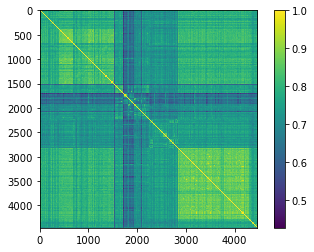

In [19]:
plt.imshow(sim_mat)
plt.colorbar()

In [20]:
np.save('sim_mat.npy', sim_mat)

In [21]:
valid_idx = np.array([i for i in range(len(seq)) if seq[i] != 'None'])
valid_idx.size, len(seq)

valid_mat = sim_mat[valid_idx][:, valid_idx]
sim_mat.shape, valid_mat.shape

((4459, 4459), (4459, 4459))

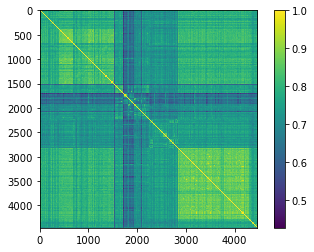

In [22]:
plt.imshow(valid_mat)
plt.colorbar()

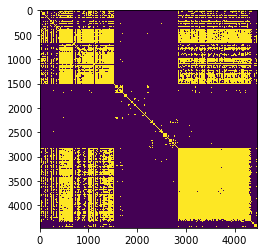

In [23]:
valid_mat.min(), valid_mat.max()
plt.imshow(valid_mat > 0.8)

In [24]:
%%time
u,s,v = np.linalg.svd(valid_mat, full_matrices=0)

Wall time: 23.4 s


In [ ]:
np.save('u.npy', u)
np.save('s.npy', s)
np.save('v.npy', v)

In [ ]:
plt.plot(s)

In [ ]:
s[:10]

In [ ]:
rank = 10
approx = u[:,:rank].dot(np.diag(s[:rank])).dot(v[:rank])
residues = approx - valid_mat
errors = (residues/valid_mat)

In [ ]:
plt.hist(errors.flatten())

In [ ]:
# rank = 1000
# approx_1000 = u[:,:rank].dot(np.diag(s[:rank])).dot(v[:rank])
# errors = ((approx_1000 - valid_mat)/valid_mat)
# plt.hist(errors.flatten())